### Applications of Data Science
# Lab 3
# Preparing Text Data with R

## Overview

This lab introduces you to the basics of text mining and text data preparation. In this lab you will work with a set of 160,000 tweets, which include sentiment labels. 

Social media sentiment is an important indicator of public opinion.  Determining sentiment can be valuable in a number of applications including brand awareness, product launches, and detecting political trends. 

Raw text is inherently messy. Machine understanding and analysis is inhibited by the presence of extraneous symbols and words that clutter the text. The exact nature of the required text cleaning depends on the application.  In this case, you will focus on text cleaning to facilitate sentiment classification.The presence of certain words determines the sentiment of the tweet. Words and symbols which are extraneous to this purpose are distractions at best, and a likely source of noise in the analysis. You will follow these steps to prepare the tweet text for analysis: 

- Symbols and unnecessary white space which do not convey sentiment are removed, leaving only alphabetic characters.
- There is no difference in the sentiment conveyed by a word in upper case or lower case, so all case is set to lower. 
- Stop words are words that occur with high frequency in text, but do not have any particular meaning. Examples include word like ÃÂ¢ÃÂÃÂtheÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂandÃÂ¢ÃÂÃÂ and ÃÂ¢ÃÂÃÂthisÃÂ¢ÃÂÃÂ. Since these words are relatively common, yet communicate no particular sentiment, they can bias analytics.  Therefore, stopwords which do not convey sentiment are therefore removed from the tweet text.
- stem is a root word. For example, ÃÂ¢ÃÂÃÂgoÃÂ¢ÃÂÃÂ is the root word of conjugated verbs, ÃÂ¢ÃÂÃÂgoingÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂgoesÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂgoneÃÂ¢ÃÂÃÂ. The meaning of these words is the same in terms of analysis. A process known as stemming is applied to transform words to their roots, before analysis. 


## What you will need
To complete this lab, you will need the following:
- A web browser and Internet connection
- An Azure ML workspace
- The lab files for this lab


## Load and transform the tweet data

As a first step, ensure that you have uploaded the **tweets.csv** and **stopwords.csv ** files as new datasets in your Azure Machine Learning workspace. Then use the following code to load the tweets data set and set the column names to convenient values.

In [1]:
library(tm)
library("AzureML")
ws <- workspace()
dataset <- download.datasets(ws, "tweets.csv")
colnames(dataset) <- c("sentiment", "tweets") # Set the column names
head(dataset)

Loading required package: NLP


sentiment,tweets
4,"@elephantbird Hey dear, Happy Friday to You Already had your rice's bowl for lunch ?"
4,Ughhh layin downnnn Waiting for zeina to cook breakfast
0,"@greeniebach I reckon he'll play, even if he's not 100%...but i know nothing!! ;) It won't be the same without him."
0,@vaLewee I know! Saw it on the news!
0,very sad that http://www.fabchannel.com/ has closed down. One of the few web services that I've used for over 5 years
0,@Fearnecotton who sings 'I Remember'? i alwaysss hear it on Radio 1 but never catch the artist


Examine the head of the data frame shown above, noticing the content of the two columns.

- The **Sentiment** column contains a sentiment score ``{0,4}`` for negative of positive sentiment of the tweet.
- The **Tweets** column contains the actual text of the tweet. 

In order to work with the text in the tweets using the tools in the R tm package, you must convert them to a corpus object. A tm vector corpus is a vector of corpus objects. In this case, the text of each tweet is a single corpus. 

Execute the code in the cell below to create a tm vector corpus object. 

In [2]:
tweet.text <- Corpus(VectorSource(dataset['tweets']))
class(tweet.text)

[1] "VCorpus" "Corpus"

## Clean and Lower Case Symbols with R 
In this exercise you will take the first steps in preparing the tweet text using custom R code. You will use the R Text Mining package tm to perform some basic filtering and cleaning of the tweet text. Using the tools in the tm package you will perform the following steps:

- Remove numbers.
- Remove punctuation.
- Remove excess white space.
- Convert to lower case.

Each line in the code cell below using the **tm_map** funciton to apply the specified transformation to the text. Execute the code in the cell below to clean and lower case the tweet text. 

In [3]:
tweet.text <- tm_map(tweet.text, content_transformer(removeNumbers))
tweet.text <- tm_map(tweet.text, content_transformer(removePunctuation))
tweet.text <- tm_map(tweet.text, content_transformer(stripWhitespace))
tweet.text <- tm_map(tweet.text, content_transformer(tolower))

Next, you will create a term-document matrix (TDM) of the tweets. A TDM is a sparse matrix structure with the words (terms) in the rows and documents which may or may not contain that word in the columns. The count of word occurrence of the document is contained in the cells.

The frequency of words is simply computed by summing the values in the rows. Note that the row_sums function from the slam package is used to deal with the sparse matrix structure. A dataframe is then constructed with the words and their frequencies in descending order. 

Execute the code in the cell below to compute the TDM, the word frequencies and examine the head of the data frame.

In [4]:
to.WF = function(corpus){
    require(tm)
    ## Compute a term-document matrix and then 
    ## compute the word frequencies.
    library(slam)
    tdm <- TermDocumentMatrix(corpus, control = list(stopwords = FALSE))
    tdm <- removeSparseTerms(tdm, 0.9999999)
    freq <- row_sums(tdm, na.rm = T)   
    ## Sort the word frequency and build a dataframe
    ## including the cumulative frequecy of the words.
    freq <- sort(freq, decreasing = TRUE)
    word.freq <- data.frame(word = factor(names(freq), levels = names(freq)), 
                        freq = freq)
    word.freq['Cum'] <- cumsum(word.freq['freq'])/sum(word.freq$freq)
    word.freq
}

wf = to.WF(tweet.text)
head(wf, n = 20)

,word,freq,Cum
the,the,51366,0.03266961
and,and,29900,0.05168649
you,you,26847,0.06876162
for,for,21508,0.08244106
have,have,14357,0.09157234
that,that,14059,0.10051409
just,just,12674,0.10857496
but,but,12651,0.11662120
with,with,11401,0.12387242
its,its,10912,0.13081263


Notice that the most frequent words are in the head of this data frame. Of these 20 most frequent words, only one, 'good', is likely to convey much information on sentiment.  

The code in the cell below uses the ggplot2 package to create a bar plot of the work frequencies computed from the TDM. Execute this code to view the bar plot. 


Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



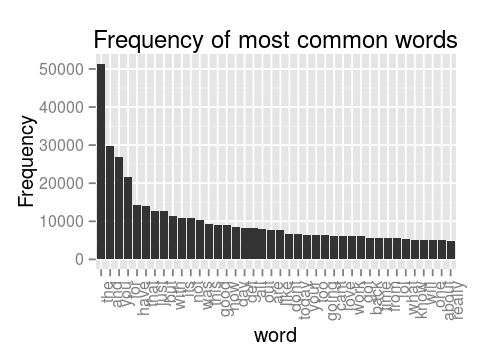

In [5]:
bar.TDF = function(word.freq){
    library(ggplot2)
    #dev.new(width=12, height=9)
    ggplot(word.freq[1:40,], aes(word, freq)) +
      geom_bar(stat = 'identity') +
      ggtitle('Frequency of most common words') +
      ylab('Frequency') +
      theme(axis.text.x = element_text(angle = 90, hjust = 1))
}
bar.TDF(wf)

Examine this plot and notice the most frequent words. Many of the most frequent words are stop words, such as ÃÂ¢ÃÂÃÂtheÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂandÃÂ¢ÃÂÃÂ, and ÃÂ¢ÃÂÃÂyouÃÂ¢ÃÂÃÂ, which are not likely to be helpful in determining sentiment. Also, the frequency of the words drops off fairly quickly to less than 500 out of the 160,000 tweets.

Another tool for examining the frequency of words in a corpus of documents is the cumulative distribution frequency (CDF) plot. Execute the code in the cell below to display the CDF using ggplot2. 

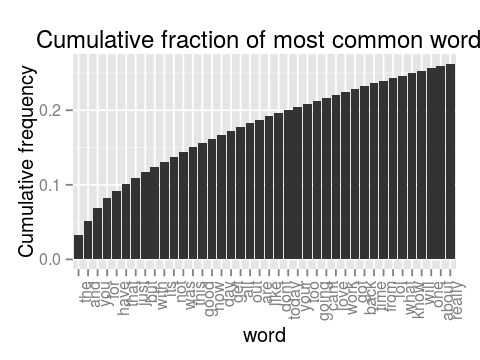

In [6]:
cdf.TDF = function(word.freq){
    ggplot(word.freq[1:40,], aes(word, Cum)) +
    geom_bar(stat = 'identity') +
    ggtitle('Cumulative fraction of most common words') +
    ylab('Cumulative frequency') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
}
cdf.TDF(wf)

The conclusions one can draw from the second chart are largely the same as the first. The most frequent words are stop words and the frequency of words drops off rather quickly. ALso notice, that the frequency of the words becomes uniform fairly quickly. 

Finally, you can examine the normalized text in the processed tweets by executing the code in the cell below. 

In [7]:
head(data.frame(sentiment = dataset$sentiment, 
                text = enc2utf8(unlist(sapply(tweet.text, `[`, "content"))), stringsAsFactors=F))

,sentiment,text
tweets.content1,4,elephantbird hey dear happy friday to you already had your rices bowl for lunch
tweets.content2,4,ughhh layin downnnn waiting for zeina to cook breakfast
tweets.content3,0,greeniebach i reckon hell play even if hes not but i know nothing it wont be the same without him
tweets.content4,0,valewee i know saw it on the news
tweets.content5,0,very sad that httpwwwfabchannelcom has closed down one of the few web services that ive used for over years
tweets.content6,0,fearnecotton who sings i remember i alwaysss hear it on radio but never catch the artist


Examine this text. Notice that all text is lower case and there are no numbers, punctuation or special characters. 

****

You will now Examine the head of the resulting word frequency data frame to determine the following:

- What is the percentage of all words for these first 20 words? 
- Of these 20 words, how many are likely to contibute sentiment information? 
- Are these 20 words different from the words seen for the raw text? 

To perform this exercise, apply the **head** function, with the n = 20 argument, to the **wf** data frame. 
****

In [8]:
head(wf, n = 20)

,word,freq,Cum
the,the,51366,0.03266961
and,and,29900,0.05168649
you,you,26847,0.06876162
for,for,21508,0.08244106
have,have,14357,0.09157234
that,that,14059,0.10051409
just,just,12674,0.10857496
but,but,12651,0.11662120
with,with,11401,0.12387242
its,its,10912,0.13081263


## Remove stop words

In the previous section you removed extraneous characters and whitespace from the tweet text. The results show that the most frequent words do not communicate much sentiment information. These frequent words, which are largely extraneous, are known as stop words and should be removed from the text before further analysis. In this exercise you will use custom R or Python code to remove stop words from the tweet text.

As a first step you will load the list of stop words, and examine the first 100 by executing the code in the cell below. 

In [9]:
stop.words <- download.datasets(ws, "stopwords.csv")
stop.words = unique(stop.words)
stop.words[1:100,]

[1] "a"        "about"    "above"    "actual"   "after"    "again"   
  [7] "against"  "all"      "alreadi"  "also"     "alway"    "am"      
 [13] "amp"      "an"       "and"      "ani"      "anoth"    "any"     
 [19] "anyth"    "are"      "aren't"   "around"   "as"       "at"      
 [25] "aww"      "babi"     "back"     "be"       "becaus"   "because" 
 [31] "bed"      "been"     "befor"    "before"   "being"    "below"   
 [37] "between"  "birthday" "bit"      "book"     "both"     "boy"     
 [43] "but"      "by"       "call"     "can"      "can't"    "cannot"  
 [49] "cant"     "car"      "check"    "com"      "come"     "could"   
 [55] "couldn't" "day"      "did"      "didn"     "didn't"   "dinner"  
 [61] "do"       "doe"      "does"     "doesn"    "doesn't"  "doing"   
 [67] "don"      "don't"    "done"     "dont"     "down"     "during"  
 [73] "each"     "eat"      "end"      "even"     "ever"     "everyon" 
 [79] "exam"     "famili"   "feel"     "few"      "final"    "find"    
 [85] "first"    "follow"   "for"      "for."     "found"    "friday"  
 [91] "from"     "further"  "game"     "get"      "girl"     "give"    
 [97] "gone"     "gonna"    "got"      "gotta"

Examine the stop word list and notice the following:

- These words are generally common in English language text.
- None of these words seem likely to indicate any particular sentiment. 
- Some of these words, like 'aww', are specialized to this application of analyzing tweets. 

The code in the cell below applies the **removeWords** operation to the tweet text. Execute the code in the cell to remove the stop words from the tweets and plot the word frequency.

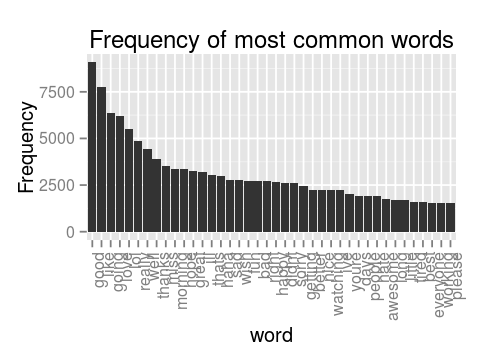

In [10]:
tweet.text <- tm_map(tweet.text, removeWords, stop.words[, 'words'])
wf = to.WF(tweet.text)
bar.TDF(wf)

The distribution of word frequency is not quite different. Note that many of the most frequent words are now likely to convey some sentiment, such as ÃÂ¢ÃÂÃÂgoodÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂlikeÃÂ¢ÃÂÃÂ, and ÃÂ¢ÃÂÃÂlove. Evidently, removing stop words has had the desired effect.

Next, execute the code in the cell below to display the CDF of the tweets with the stop words removed. 

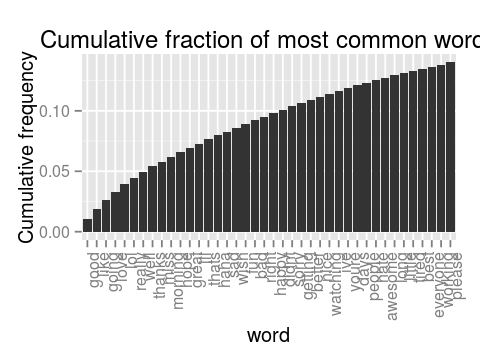

In [11]:
cdf.TDF(wf)

As before, this chart shows a number of frequent words which are likely to convey sentiment. However, note that these 40 most frequent words only make up about 15% or the total. 

****

You will now examine the head of the resulting word frequency data frame to determine the following:

- What is the percentage of all words for these first 20 words? 
- Of these 20 words, how many are likely to contribute sentiment information? 
- Are these 20 words different from the words seen for the normalized text? 

To perform this exercise, apply the **head** function, with the **n = 20** argument, to the **wf** data frame. 
****

In [12]:
head(wf, n = 20)

,word,freq,Cum
good,good,9076,0.01019084
like,like,7767,0.01891188
going,going,6384,0.02608005
love,love,6217,0.03306071
lol,lol,5489,0.03922394
really,really,4859,0.04467979
well,well,4451,0.04967752
thanks,thanks,3899,0.05405545
miss,miss,3548,0.05803926
morning,morning,3386,0.06184118


## Stem the Words

You have cleaned the tweet text and removed stop words. There is one last data preparation step required, stemming the words. Stemming is a process of reducing words to their stems or roots. For example, conjugated verbs such as ÃÂ¢ÃÂÃÂgoesÃÂ¢ÃÂÃÂ, ÃÂ¢ÃÂÃÂgoingÃÂ¢ÃÂÃÂ, and ÃÂ¢ÃÂÃÂgoneÃÂ¢ÃÂÃÂ are stemmed to the word ÃÂ¢ÃÂÃÂgoÃÂ¢ÃÂÃÂ.  Both Python and R offer a choice of stemmers. Depending on this choice, the results can be more or less suitable for the application. In this case, you will use the popular Porter stemmer. 

The Porter stemmer is in the R **SnowBallC** library. Execute the code in the cell below to load and apply the Porter stemmer to the tweet text and lot the bar chart of the word frequency.

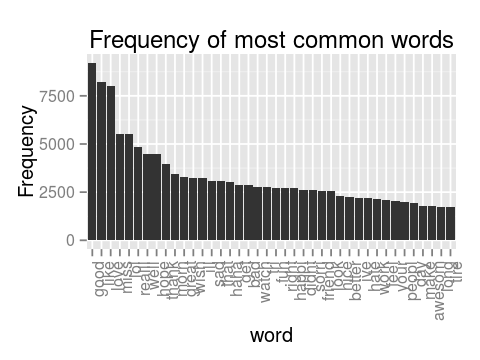

In [13]:
library(SnowballC) ## For stemming words
tweet.text <- tm_map(tweet.text, stemDocument)
wf = to.WF(tweet.text)
bar.TDF(wf)

To display the CDF plot of the word frequency, execute the code in the cell below. 

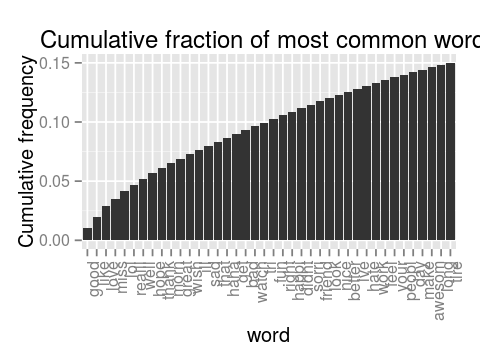

In [14]:
cdf.TDF(wf)

Compare these two charts using the stemmed words to the charts created with just stop word filtering and notice the differences. These differences are quite noticeable. For example, some words like ÃÂ¢ÃÂÃÂgoodÃÂ¢ÃÂÃÂ and 'like' have moved higher in the order of most frequent words, while some other words like ÃÂ¢ÃÂÃÂgoingÃÂ¢ÃÂÃÂ have moved down. 

Finally, to examine a sample of the prepared tweet text, . 

In [15]:
head(data.frame(sentiment = dataset$sentiment, 
                text = enc2utf8(unlist(sapply(tweet.text, `[`, "content"))), stringsAsFactors=F))

,sentiment,text
tweets.content1,4,elephantbird dear happi alreadi rice bowl
tweets.content2,4,ughhh layin downnnn wait zeina cook breakfast
tweets.content3,0,greeniebach reckon hell hes noth wont without
tweets.content4,0,valewe news
tweets.content5,0,sad httpwwwfabchannelcom close web servic ive use year
tweets.content6,0,fearnecotton sing rememb alwaysss radio catch artist


Compare these two charts using the stemmed words to the charts created with just stop word filtering and notice the differences. These differences are quite noticeable. For example, some words like ÃÂ¢ÃÂÃÂgoodÃÂ¢ÃÂÃÂ and 'like' have moved higher in the order of most frequent words, while some other words like ÃÂ¢ÃÂÃÂgoingÃÂ¢ÃÂÃÂ have moved down. 

****

You will now examine the head of the resulting word frequency data frame to determine the following:

- Have any of the words in the list been stemmed? 
- Has the stemming changed the frequency of these words?

To perform this exercise, apply the **head** function, with the **n = 20** argument, to the **wf** data frame.
****

In [16]:
head(wf, n = 20)

,word,freq,Cum
good,good,9214,0.01042899
like,like,8241,0.01975667
love,love,7991,0.02880139
miss,miss,5512,0.03504022
lol,lol,5508,0.04127452
realli,realli,4859,0.04677425
well,well,4469,0.05183254
hope,hope,4464,0.05688518
thank,thank,3982,0.06139226
morn,morn,3451,0.06529832
